<table><tr>
<td> <img src="https://www.rigzone.com/images/jobs/logos/montd-or-bg.gif" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://npc-core.com/npc-content/uploads/2021/03/core-analysis-cores-combo.jpeg" alt="Drawing" style="width: 250px;"/> </td>    
<td> <img src="https://ars.els-cdn.com/content/image/1-s2.0-B9780444635334000068-f06-15-9780444635334.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

<h1 align=center><font size = 4> Munish Kumar </font></h1>
<h1 align=center><font size = 4> P6305_Updated_Reserves_Report </font></h1>
<h1 align=center><font size = 4> Routine & Special Core Analysis </font></h1>
<h1 align=center><font size = 3> ERCE 2023 </font></h1>

#### Libraries

In [1]:
# Only install the following libraries if you dont have it, otherwise leave it commented out

#!conda install -c anaconda natsort --yes
#!conda install -c anaconda xlrd --yes
#!pip install sympy --user

# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
from natsort import natsorted
sns.set()

# Sklearn Liraries
from sklearn import preprocessing

# For Latex style text
from sympy import S, symbols, printing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

# Display max rows
pd.set_option('display.max_rows', 500)

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


###### Declare some global variables

In [2]:
dir_name = r'C:\Users\mkumar\Documents\GitHub\munishkumar-gh.github.io\Core_Analysis_MD'
filename_suffix = 'csv'

# Font, marker size and axis rotation
edgecolors = 'black'
markersize = 16
alpha = 0.5
size = 18
rotation = 0

###### Series of Functions

In [3]:
# Function to look at first 5 and last 5 elements in a dataframe
def ends(df, x=5):
    return df.head(x).append(df.tail(x))
setattr(pd.DataFrame,'ends',ends)

In [4]:
# Function to read out file
def file_out(df, dir_name, base_filename, filename_suffix):
    try:
        csvs_sht = os.path.join(dir_name, base_filename + "." + filename_suffix)
        df.to_csv(csvs_sht, index = False, header=True)
        print ("Final File Extract Produced")
    except IOError:
        print("I/O error")
    return

In [5]:
# Function to search for a text string
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

In [6]:
# Function to plot grain density
def plot_grain_density(mod_df, title, bins, xmin, xmax, savefn):
    sns.set()
    sns.set_style("whitegrid")     
    sns.set_style("ticks", 
                  {"xtick.major.size":size,
                  "ytick.major.size":size}
                 )
    sns.axes_style("whitegrid")
    kwargs = {'cumulative': True}

    ax = sns.distplot(mod_df, 
                      bins = bins, 
                      kde=False, 
                      norm_hist=False, 
                      color = 'r',
                      #bw_adjust=.25,
                      #hist_kws=kwargs, 
                      #kde_kws=kwargs
                     )

    ax.set(ylabel='Frequency', 
           #xlabel='common ylabel',
           xlim = (xmin, xmax),
          )

    ax.legend(labels=['Histogram', 'Frequency'])
    plt.title(title)
    plt.grid(True)

    plt.savefig(savefn, transparent=True)
    return

In [7]:
# Plotting the effect of NOBP
def plot_NOBP(mod_df, df_sub, grouped, color, savefn):
    # Plot per group
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(121)

    for i, (name, group) in enumerate(grouped):
        sc = ax.scatter(
            group["NOB (psi)"],
            group["Porosity (%)"],
            s = markersize**2,
            alpha=0.5,
            label=name,
            edgecolors = edgecolors,
        )  

    # Add legends (one for gender, other for size)
    ax.add_artist(ax.legend(title='Well Name'))
    ax.legend(*sc.legend_elements("colors", num=6))
    ax.set_xlabel('Net Overburden Pressure (psi)', fontsize=size)
    ax.set_ylabel('Porosity (%)', fontsize=size)

    plt.xticks(rotation = rotation, fontsize=size)
    plt.yticks(rotation = rotation, fontsize=size)
    plt.ylim(0,20) 
    plt.grid(True)
    
    ax1 = fig.add_subplot(122)

    for i, (name, group) in enumerate(grouped):
        sc1 = ax1.scatter(
            group["NOB (psi)"],
            group["K_klin (mD)"],
            s = markersize**2,
            alpha=0.5,
            label=name,
            edgecolors = edgecolors,
        )  

    # Add legends 
    ax1.add_artist(ax1.legend(title='Well Name'))
    ax1.legend(*sc1.legend_elements("colors", num=6))
    ax1.set_xlabel('Net Overburden Pressure (psi)', fontsize=size)
    ax1.set_ylabel('Permeability (mD)', fontsize=size)

    plt.xticks(rotation = rotation, fontsize=size)
    plt.yticks(rotation = rotation, fontsize=size)
    #plt.ylim(0,20)

    plt.tight_layout()
    plt.grid(True)

    plt.savefig(savefn, transparent=True)
    return

In [8]:
def plot_PP(df_sub, grouped, color, title, savefn, xint1, yint1, xint2, yint2, xlimit, ylimit, plot_line_eqn):
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111)

    for i, (name, group) in enumerate(grouped):
        sc = ax.scatter(
            group["Porosity (%)"],
            group["K_klin (mD)"],
            s = markersize**2,
            alpha=0.5,
            label=name,
            edgecolors = edgecolors,
        )  

    # Add legends
    ax.add_artist(ax.legend(title='Well Name'))
    ax.legend(*sc.legend_elements("colors", num=6), prop={'size': 20})
    ax.set_xlabel('Porosity (%)', fontsize=size)
    ax.set_ylabel('Permeability (mD)', fontsize=size)

    plt.xticks(rotation = rotation, fontsize=size)
    plt.yticks(rotation = rotation, fontsize=size)
    plt.xlim(0, xlimit)
    plt.ylim(0.0001, ylimit)
    
    df_sub = df_sub[['Porosity (%)', 'K_klin (mD)']].sort_values(by = 'Porosity (%)', ascending = True)
    
    # Fit to linear-log
    y1 = df_sub["Porosity (%)"] #x-value
    y2 = df_sub["K_klin (mD)"] #y-value 
   
    ## Eqn Fit 1 ##
    # For fitting y = Ax^B, ln y = ln A + B ln x. So fit (ln y) against (ln x).
    #p = np.polyfit(np.log(y1), np.log(y2), 1, w=np.sqrt(y2/2)) # w is weight to bias against larger values of y
    p = np.polyfit(np.log(y1), np.log(y2), 1)
    f = np.poly1d(p)

    ## Eqn Fit 2 ##
    # For fitting y = Ae^(Bx), ln y = ln A + Bx. So fit (ln y) against x.
    #p = np.polyfit(y1, np.log(y2), 1, w=np.sqrt(y2)) # w is weight to bias against larger values of y
    #p = np.polyfit(y1, np.log(y2), 1)
    #f = np.poly1d(p)

    if plot_line_eqn == True: 
        ax.semilogy(y1, np.exp(p[0] * np.log(y1) + p[1]), 'k--', linewidth = 2.5)
        #Display Equation
        #plt.text(17.5, 100, r'Equation ={}'.format(f), fontsize = size,bbox=dict(facecolor='white', alpha=0.25))
        #plt.title (title, fontsize = size)
    else:
        p[0] = 0
        p [1] = 0
        f = np.poly1d(p)
    
    # here we add the vertical and horizontal line 1
    plt.axvline(x=xint1, color='darkorange',linestyle='--',linewidth=2)
    plt.axhline(y=yint1, color='darkorange',linestyle='--',linewidth=2)
    
    # here we add the horizontal and horizontal line 2
    plt.axvline(x=xint2, color='darkgreen',linestyle=':',linewidth=2)
    plt.axhline(y=yint2, color='darkgreen',linestyle=':',linewidth=2)

    ax.set_yscale('log')

    plt.tight_layout()
    plt.grid(True)
    
    plt.savefig(savefn, transparent=True)
    return f, p[0], p[1]

# Cementation Exponent

##### Read in the data and some preprocessing

In [9]:
# Header file comes preformatted as 1st row is variable name, 2nd row reads "Low, Best, High"
# Combines the first 2 rows of header into 1 header

df = pd.read_excel(
    'CoreData_MD.xlsx', 
    header=[0, 1], 
    sheet_name='Elec_Prop_M', 
    keep_default_na=False,
    #usecols="A,C:AA"
)
df.columns=df.columns.to_flat_index()

# renaming the columns
df.columns = ['Well Name', 'Sample ID', 'Depth (m)', 'NOB (psi)', 'Grain Density (g/cc)', 'K_klin (mD)', 'Porosity (%)', 'F', 'm']
df.ends(10)

C:\Users\mkumar\AppData\Local\Temp\ipykernel_21900\3237448987.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.head(x).append(df.tail(x))


,Well Name,Sample ID,Depth (m),NOB (psi),Grain Density (g/cc),K_klin (mD),Porosity (%),F,m
0,MGH-1,204,1040.95,1614.7,2.65,292.000,20.4,26.30,2.05
1,MGH-2,1,902.50,1614.7,2.65,0.300,14.1,62.39,2.11
2,MGH-2,7,1024.50,1614.7,2.65,1.510,17.2,32.75,1.98
3,MGH-2,12,1070.00,1614.7,2.65,28.900,14.9,38.31,1.91
4,MGH-2,14,1119.50,1614.7,2.65,31.800,12.9,52.80,1.94
5,MGH-2,20,1261.50,1614.7,2.65,0.420,11.4,34.43,1.63
6,MGH-3,207,1005.87,1614.7,2.64,1140.000,23.1,19.70,2.03
7,MGH-5,108,1009.11,1614.7,2.64,874.000,19.4,24.90,1.96
8,MGH-5,203,1031.03,1614.7,2.64,48.600,17.2,43.50,2.14
9,MGH-5,207,1032.15,1614.7,2.65,1.130,9.2,150.90,2.10


##### Remove Missing Rows based on Missing Permeability and Porosity Values

In [10]:
df = df.replace(r'^\s*$', np.nan, regex=True)

cols = ['K_klin (mD)', 'Porosity (%)']

mod_df = df.dropna(how='any', subset=cols)
mod_df = df[df['K_klin (mD)'] > 0.01]
mod_df

,Well Name,Sample ID,Depth (m),NOB (psi),Grain Density (g/cc),K_klin (mD),Porosity (%),F,m
0,MGH-1,204,1040.95,1614.7,2.65,292.000,20.4,26.30,2.05
1,MGH-2,1,902.50,1614.7,2.65,0.300,14.1,62.39,2.11
2,MGH-2,7,1024.50,1614.7,2.65,1.510,17.2,32.75,1.98
3,MGH-2,12,1070.00,1614.7,2.65,28.900,14.9,38.31,1.91
4,MGH-2,14,1119.50,1614.7,2.65,31.800,12.9,52.80,1.94
5,MGH-2,20,1261.50,1614.7,2.65,0.420,11.4,34.43,1.63
6,MGH-3,207,1005.87,1614.7,2.64,1140.000,23.1,19.70,2.03
7,MGH-5,108,1009.11,1614.7,2.64,874.000,19.4,24.90,1.96
8,MGH-5,203,1031.03,1614.7,2.64,48.600,17.2,43.50,2.14
9,MGH-5,207,1032.15,1614.7,2.65,1.130,9.2,150.90,2.10


###### Mapping each well to a colour

In [11]:
df_colors = pd.read_csv('https://raw.githubusercontent.com/codebrainz/color-names/master/output/colors.csv',header=None)
df_colors.columns = ['color_name', 'color_description', 'hex_value', 'r', 'g','b']

names = mod_df['Well Name'].unique()
c = df_colors[['hex_value']].astype(str).agg(','.join,axis=1).tolist()
colors = dict(zip(names,c))

mod_df['color'] = mod_df['Well Name'].apply(lambda x: colors[x])
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well Name             26 non-null     object 
 1   Sample ID             26 non-null     object 
 2   Depth (m)             26 non-null     float64
 3   NOB (psi)             26 non-null     float64
 4   Grain Density (g/cc)  26 non-null     float64
 5   K_klin (mD)           26 non-null     float64
 6   Porosity (%)          26 non-null     float64
 7   F                     26 non-null     float64
 8   m                     26 non-null     float64
 9   color                 26 non-null     object 
dtypes: float64(7), object(3)
memory usage: 2.2+ KB


In [12]:
for well in mod_df['Well Name'].unique():
        print(mod_df[mod_df['Well Name'] == well].info())      
        print(mod_df[mod_df['Well Name'] == well].describe(include='all'))       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well Name             1 non-null      object 
 1   Sample ID             1 non-null      object 
 2   Depth (m)             1 non-null      float64
 3   NOB (psi)             1 non-null      float64
 4   Grain Density (g/cc)  1 non-null      float64
 5   K_klin (mD)           1 non-null      float64
 6   Porosity (%)          1 non-null      float64
 7   F                     1 non-null      float64
 8   m                     1 non-null      float64
 9   color                 1 non-null      object 
dtypes: float64(7), object(3)
memory usage: 88.0+ bytes
None
       Well Name  Sample ID  Depth (m)  NOB (psi)  Grain Density (g/cc)  \
count          1        1.0       1.00        1.0                  1.00   
unique         1        1.0        NaN        NaN                   NaN   
t

In [13]:
print(mod_df.info())
print(mod_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well Name             26 non-null     object 
 1   Sample ID             26 non-null     object 
 2   Depth (m)             26 non-null     float64
 3   NOB (psi)             26 non-null     float64
 4   Grain Density (g/cc)  26 non-null     float64
 5   K_klin (mD)           26 non-null     float64
 6   Porosity (%)          26 non-null     float64
 7   F                     26 non-null     float64
 8   m                     26 non-null     float64
 9   color                 26 non-null     object 
dtypes: float64(7), object(3)
memory usage: 2.2+ KB
None
       Well Name  Sample ID    Depth (m)    NOB (psi)  Grain Density (g/cc)  \
count         26       26.0    26.000000    26.000000             26.000000   
unique         6       25.0          NaN          NaN                 

## Determine Properties based on a particular Net Overburden Pressure (NOBP) value

In [14]:
a = mod_df['NOB (psi)'].unique()
print(sorted(a))

[1514.7, 1614.7, 1834.7, 1884.7, 1904.7, 2134.7]


Some of the net overburden values are missing. It will be assumed that these are ambient values i.e. 800 psi

In [15]:
mod_df['NOB (psi)'].fillna(14.7, inplace=True)
mod_df['NOB (psi)'].isnull().values.any()

False

#### Histogram - Plotting the Grain Density, Porosity and Permeability at Ambient (800 psi)

In [16]:
NOBP = 3000

In [17]:
df_sub = mod_df[mod_df['NOB (psi)'] <= NOBP]
grouped = df_sub.groupby("Well Name")
color = df_sub['color']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


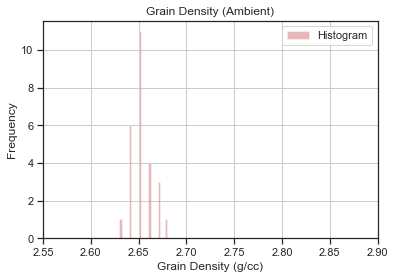

In [18]:
savefn = "Hist_FF_GD.png"

## fuction to plot - usage
## plot_grain_density (dataframe_column, plot_title, number_bins, x-axis_min, x_axis_max savefile_name)
plot_grain_density(df_sub['Grain Density (g/cc)'], "Grain Density (Ambient)", 20, 2.55, 2.9, savefn)

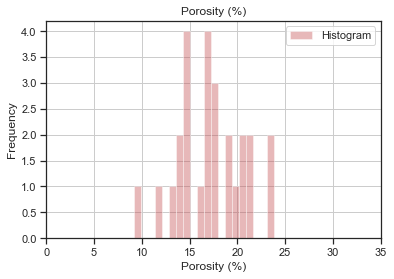

In [19]:
savefn = "Hist_FF_Poro.png"
plot_grain_density(df_sub["Porosity (%)"], "Porosity (%)", 20, 0, 35, savefn)

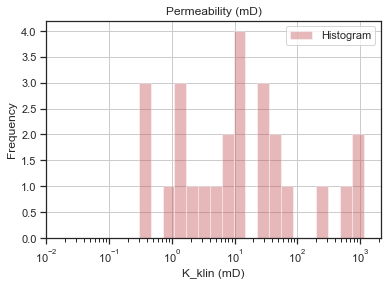

In [20]:
savefn = "Hist_FF_Perm.png"

x= df_sub["K_klin (mD)"]

logbins = np.geomspace(x.min(), x.max(), 20)
plt.xscale('log')
plot_grain_density(df_sub["K_klin (mD)"], "Permeability (mD)", logbins, 0.01, x.max()+1000, savefn)

#### Plot cross-plot of Porosity-Permeability

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:1099: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Equation of line:  
6.784 x - 16.72
Intercept: 6.784417759410117
Gradient Coefficient: -16.72455026306045


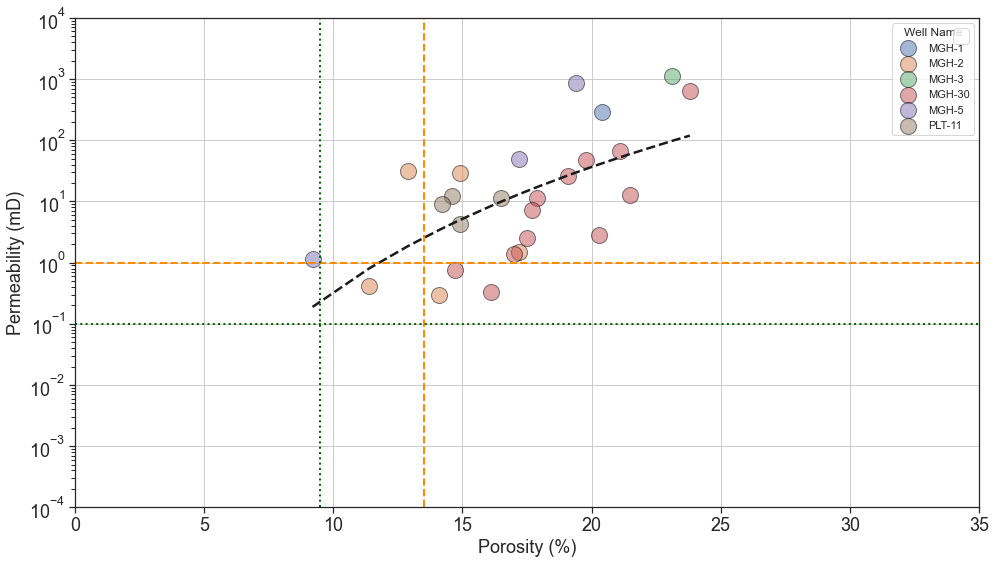

In [21]:
savefn = "Poro_FF_Perm.png"

xlimit = 35
ylimit = 10000

#Cutoff intercept
yint1 = 1
xint1 = 13.5

yint2 = 0.1
xint2 = 9.5

plot_line_eqn = True

f, p0, p1 = plot_PP(df_sub, grouped, color, 
                    "Porosity vs Permeability", savefn, xint1, yint1, 
                    xint2, yint2, xlimit, ylimit, plot_line_eqn)
print("Equation of line:", f)
print("Intercept:", p0)
print("Gradient Coefficient:", p1)

### Evaluation of Formation Factor

In [22]:
df_sub['Porosity_(V/V)'] = df_sub['Porosity (%)']/100

df_sub = df_sub.sort_values("Porosity_(V/V)", ascending=True)

x = df_sub['Porosity_(V/V)']
y = df_sub['F']
m = df_sub['m'].mean()

print('Average Cementation Exponent:', m)

Average Cementation Exponent: 1.9261538461538459


In [23]:
def FF_RI_plot(x, y, a, b1, b2, b3, index_min, 
               index_avg, index_max, savefn, xlim, ylim, xlab, ylab, 
               tit, fs, xcoor, ycoor1, ycoor2, ycoor3
              ):
    # Font, marker size and axis rotation
    edgecolors = 'black'
    markersize = 16
    alpha = 0.5
    size = 18
    rotation = 0
   
    #Plot Raw Data
    plt.figure(figsize=(10,10))
    plt.scatter(x, y, c = 'yellow', edgecolor = edgecolors, s = markersize*10)

    #Fit Min Possible Line
    plt.plot(a, b1, 'r-.', linewidth = 1.5)
    plt.text(xcoor, ycoor1, r'{:.2f}'.format(index_min), fontsize = fs/1.2, bbox=dict(facecolor='white', alpha=0.5))

    #Fit Average Possible Line
    plt.plot(a, b2, 'k-', linewidth = 1.5)
    plt.text(xcoor, ycoor2, r'{:.2f}'.format(index_avg), fontsize = fs/1.2, bbox=dict(facecolor='white', alpha=0.5)) 

    #Fit Max Possible Line
    plt.plot(a, b3, 'b--', linewidth = 1.5)
    plt.text(xcoor, ycoor3, r'{:.2f}'.format(index_max), fontsize = fs/1.2, bbox=dict(facecolor='white', alpha=0.5))
    
    plt.xticks(rotation = rotation, fontsize=fs)
    plt.yticks(rotation = rotation, fontsize=fs)
    plt.xlim(0.01, xlim)
    plt.ylim(0.1, ylim)
    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel(xlab,fontsize=fs)
    plt.ylabel(ylab,fontsize=fs)
    plt.title(tit,fontsize=fs+2)

    plt.savefig(savefn, transparent=True)
    
    plt.show()
    return

In [24]:
x_pts = np.linspace(0.01,1, len(df_sub))

delta_m_min = 0.1
delta_m_max = 0.1

m_avg = m
m_min = m_avg - delta_m_min
m_max = m_avg + delta_m_max

df_new = pd.DataFrame(x_pts, columns = ['Porosity (V/V)'])

df_new['F_avg'] = np.exp(-m_avg*np.log(x_pts))
df_new['F_min'] = np.exp(-m_min*np.log(x_pts))
df_new['F_max'] = np.exp(-m_max*np.log(x_pts))
df_new.ends(5)

C:\Users\mkumar\AppData\Local\Temp\ipykernel_21900\3237448987.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.head(x).append(df.tail(x))


,Porosity (V/V),F_avg,F_min,F_max
0,0.0100,7117.175782,4490.634332,11279.963447
1,0.0496,325.613938,241.129949,439.698332
2,0.0892,105.137773,82.564862,133.882030
3,0.1288,51.813029,42.211479,63.598577
4,0.1684,30.916062,25.871307,36.944514
21,0.8416,1.393984,1.370151,1.418232
22,0.8812,1.275836,1.259802,1.292074
23,0.9208,1.172258,1.162625,1.181970
24,0.9604,1.080936,1.076577,1.085312
25,1.0000,1.000000,1.000000,1.000000


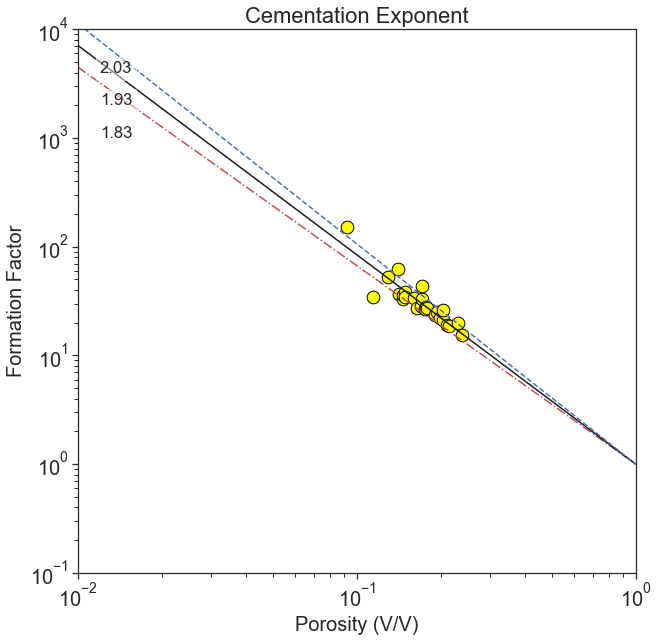

In [25]:
fs=20

a = df_new['Porosity (V/V)']
b1 = df_new['F_min']
b2 = df_new['F_avg']
b3 = df_new['F_max']

index_min = m_min 
index_avg = m_avg 
index_max = m_max

savefn = 'FF.png'
xlim = 1
ylim = 10000
xlab = "Porosity (V/V)"
ylab = "Formation Factor"
tit = "Cementation Exponent"
xcoor = 0.012
ycoor1 = 1000
ycoor2 = 2000
ycoor3 = 4000

FF_RI_plot(x, y, a, b1, b2, b3, index_min, index_avg, 
           index_max, savefn, xlim, ylim, xlab, ylab, tit, fs,
          xcoor, ycoor1, ycoor2, ycoor3)

# Saturation Exponent

##### Read in the data and some preprocessing

In [26]:
# Header file comes preformatted as 1st row is variable name, 2nd row reads "Low, Best, High"
# Combines the first 2 rows of header into 1 header

df = pd.read_excel(
    'CoreData_MD.xlsx', 
    header=[0, 1], 
    sheet_name='Elec_Prop_N', 
    keep_default_na=False,
    na_values=['-']
    #usecols="A,C:AA"
)
df.columns=df.columns.to_flat_index()

# renaming the columns
df.columns = ['Well Name', 'Sample ID', 'Depth (m)', 'NOB (psi)', 'K_klin (mD)', 'Porosity (%)','Sw (%)', 'RI', 'n']
df.ends(10)

C:\Users\mkumar\AppData\Local\Temp\ipykernel_21900\3237448987.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.head(x).append(df.tail(x))


,Well Name,Sample ID,Depth (m),NOB (psi),K_klin (mD),Porosity (%),Sw (%),RI,n
0,MGH-1,204,1040.95,1614.7,292.000,20.4,100.0,NaN,2.00
1,MGH-1,204,1040.95,1614.7,292.000,20.4,63.4,2.40,1.92
2,MGH-1,204,1040.95,1614.7,292.000,20.4,50.7,3.68,1.92
3,MGH-1,204,1040.95,1614.7,292.000,20.4,42.6,5.22,1.94
4,MGH-1,204,1040.95,1614.7,292.000,20.4,26.1,13.97,1.96
5,MGH-2,1,902.50,1614.7,0.300,14.1,83.7,1.44,2.05
6,MGH-2,1,902.50,1614.7,0.300,14.1,70.7,1.98,1.97
7,MGH-2,1,902.50,1614.7,0.300,14.1,59.4,2.86,2.02
8,MGH-2,1,902.50,1614.7,0.300,14.1,55.6,3.26,2.01
9,MGH-2,7,1024.50,1614.7,1.510,17.2,83.6,1.42,1.96


In [27]:
df = df.replace(r'^\s*$', np.nan, regex=True)

cols = ['K_klin (mD)', 'Porosity (%)', 'Sw (%)', 'RI', 'n']

mod_df = df.dropna(how='any', subset=cols)
mod_df = df[df['K_klin (mD)'] > 0.01]

mod_df['n'] = mod_df['n'].replace(np.nan, 1).astype('float')

mod_df

,Well Name,Sample ID,Depth (m),NOB (psi),K_klin (mD),Porosity (%),Sw (%),RI,n
0,MGH-1,204,1040.95,1614.7,292.000,20.4,100.0,NaN,2.00
1,MGH-1,204,1040.95,1614.7,292.000,20.4,63.4,2.40,1.92
2,MGH-1,204,1040.95,1614.7,292.000,20.4,50.7,3.68,1.92
3,MGH-1,204,1040.95,1614.7,292.000,20.4,42.6,5.22,1.94
4,MGH-1,204,1040.95,1614.7,292.000,20.4,26.1,13.97,1.96
5,MGH-2,1,902.50,1614.7,0.300,14.1,83.7,1.44,2.05
6,MGH-2,1,902.50,1614.7,0.300,14.1,70.7,1.98,1.97
7,MGH-2,1,902.50,1614.7,0.300,14.1,59.4,2.86,2.02
8,MGH-2,1,902.50,1614.7,0.300,14.1,55.6,3.26,2.01
9,MGH-2,7,1024.50,1614.7,1.510,17.2,83.6,1.42,1.96


In [28]:
print(mod_df.info())
print(mod_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Well Name     77 non-null     object 
 1   Sample ID     77 non-null     object 
 2   Depth (m)     77 non-null     float64
 3   NOB (psi)     77 non-null     float64
 4   K_klin (mD)   77 non-null     float64
 5   Porosity (%)  77 non-null     float64
 6   Sw (%)        77 non-null     float64
 7   RI            72 non-null     float64
 8   n             77 non-null     float64
dtypes: float64(7), object(2)
memory usage: 6.0+ KB
None
       Well Name  Sample ID    Depth (m)    NOB (psi)  K_klin (mD)  \
count         77       77.0    77.000000    77.000000    77.000000   
unique         5       13.0          NaN          NaN          NaN   
top       PLT-11      207.0          NaN          NaN          NaN   
freq          32       10.0          NaN          NaN          NaN   
mean         NaN  

### Evaluation of Resistivity Index

In [29]:
mod_df['Sw (V/V)'] = mod_df['Sw (%)']/100

mod_df = mod_df.sort_values('Sw (V/V)', ascending=False)

x1 = mod_df['Sw (V/V)']
y1 = mod_df['RI']
n = mod_df['n'].mean()

print('Average Saturation Exponent:', n)

Average Saturation Exponent: 1.8880519480519484


In [30]:
x_pts1 = np.linspace(0.01,1, len(mod_df))

delta_n_min = 0.1
delta_n_max = 0.1

n_avg = n
n_min = n_avg - delta_n_min
n_max = n_avg + delta_n_max

df_new = pd.DataFrame(x_pts1, columns = ['Sw (V/V)'])

df_new['RI_avg'] = x_pts1**(-n_avg)
df_new['RI_min'] = x_pts1**(-n_min)
df_new['RI_max'] = x_pts1**(-n_max)
df_new.ends(5)

C:\Users\mkumar\AppData\Local\Temp\ipykernel_21900\3237448987.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.head(x).append(df.tail(x))


,Sw (V/V),RI_avg,RI_min,RI_max
0,0.010000,5971.781322,3767.939285,9464.635564
1,0.023026,1236.531845,848.062288,1802.946583
2,0.036053,530.368795,380.427288,739.408207
3,0.049079,296.249614,219.152948,400.468415
4,0.062105,189.948673,143.862997,250.797627
72,0.947895,1.106313,1.100409,1.112249
73,0.960921,1.078168,1.073879,1.082475
74,0.973947,1.051104,1.048333,1.053882
75,0.986974,1.025065,1.023722,1.026410
76,1.000000,1.000000,1.000000,1.000000


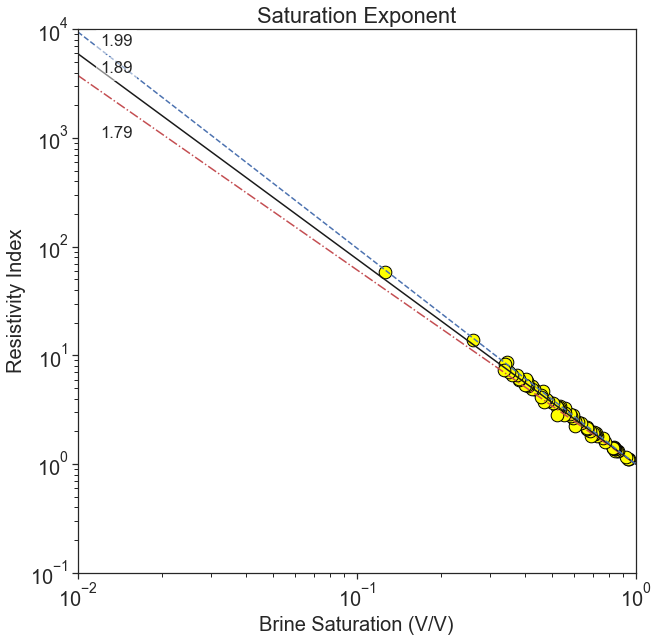

In [31]:
a = df_new['Sw (V/V)']
b1 = df_new['RI_min']
b2 = df_new['RI_avg']
b3 = df_new['RI_max']

index_min = n_min 
index_avg = n_avg 
index_max = n_max

savefn = 'RI.png'
xlim = 1
ylim = 10000
xlab = "Brine Saturation (V/V)"
ylab = "Resistivity Index"
tit = "Saturation Exponent"
xcoor = 0.012
ycoor1 = 1000
ycoor2 = 4000
ycoor3 = 7000

FF_RI_plot(x1, y1, a, b1, b2, b3, index_min, index_avg, 
           index_max, savefn, xlim, ylim, xlab, ylab, tit, fs,
          xcoor, ycoor1, ycoor2, ycoor3)

-------------------------

## Routine Core Analysis

In [32]:
# Header file comes preformatted as 1st row is variable name, 2nd row reads "Low, Best, High"
# Combines the first 2 rows of header into 1 header

df = pd.read_excel(
    'CoreData_MD.xlsx', 
    header=[0, 1], 
    sheet_name='MASTER', 
    keep_default_na=False,
    #usecols="A,C:AA"
)
df.columns=df.columns.to_flat_index()

# renaming the columns
df.columns = ['Well Name', 'Sample ID', 'Depth (m)', 'NOB (psi)', 'K_klin (mD)', 'Porosity (%)', 'Grain Density (g/cc)', 'Core Type']
df.ends(10)

C:\Users\mkumar\AppData\Local\Temp\ipykernel_21900\3237448987.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.head(x).append(df.tail(x))


,Well Name,Sample ID,Depth (m),NOB (psi),K_klin (mD),Porosity (%),Grain Density (g/cc),Core Type
0,MGH-1,101,1024.65,1600.0,0.02,11.1,2.66,RCA
1,MGH-1,102,1025.10,1600.0,64,21.1,2.65,RCA
2,MGH-1,103,1025.36,1600.0,21,18,2.65,RCA
3,MGH-1,104,1026.95,1600.0,,,2.63,RCA
4,MGH-1,201,1040.22,1600.0,,,2.61,RCA
5,MGH-1,202,1040.48,1600.0,4.8,17.4,2.64,RCA
6,MGH-1,203,1040.71,1600.0,88,20.9,2.64,RCA
7,MGH-1,204,1040.95,1600.0,175,21.2,2.64,RCA
8,MGH-1,205,1041.21,1600.0,201,18.5,2.64,RCA
9,MGH-1,206,1041.50,1600.0,35,20.8,2.64,RCA


In [33]:
df = df.replace(r'^\s*$', np.nan, regex=True)

cols = ['K_klin (mD)', 'Porosity (%)']

mod_df = df.dropna(how='any', subset=cols)
mod_df = df[df['K_klin (mD)'] > 0]
mod_df = mod_df[mod_df['Grain Density (g/cc)'] > 2.55]
mod_df = mod_df[mod_df['Grain Density (g/cc)'] < 2.85]
mod_df

,Well Name,Sample ID,Depth (m),NOB (psi),K_klin (mD),Porosity (%),Grain Density (g/cc),Core Type
0,MGH-1,101,1024.65,1600.0,0.020,11.1,2.660,RCA
1,MGH-1,102,1025.10,1600.0,64.000,21.1,2.650,RCA
2,MGH-1,103,1025.36,1600.0,21.000,18.0,2.650,RCA
5,MGH-1,202,1040.48,1600.0,4.800,17.4,2.640,RCA
6,MGH-1,203,1040.71,1600.0,88.000,20.9,2.640,RCA
7,MGH-1,204,1040.95,1600.0,175.000,21.2,2.640,RCA
8,MGH-1,205,1041.21,1600.0,201.000,18.5,2.640,RCA
9,MGH-1,206,1041.50,1600.0,35.000,20.8,2.640,RCA
10,MGH-1,207,1041.81,1600.0,0.380,7.8,2.650,RCA
11,MGH-1,208,1042.10,1600.0,0.060,5.9,2.660,RCA


In [34]:
df_colors = pd.read_csv('https://raw.githubusercontent.com/codebrainz/color-names/master/output/colors.csv',header=None)
df_colors.columns = ['color_name', 'color_description', 'hex_value', 'r', 'g','b']

names = mod_df['Well Name'].unique()
c = df_colors[['hex_value']].astype(str).agg(','.join,axis=1).tolist()
colors = dict(zip(names,c))

mod_df['color'] = mod_df['Well Name'].apply(lambda x: colors[x])
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 243
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well Name             238 non-null    object 
 1   Sample ID             238 non-null    object 
 2   Depth (m)             238 non-null    float64
 3   NOB (psi)             238 non-null    float64
 4   K_klin (mD)           238 non-null    float64
 5   Porosity (%)          238 non-null    float64
 6   Grain Density (g/cc)  238 non-null    float64
 7   Core Type             238 non-null    object 
 8   color                 238 non-null    object 
dtypes: float64(5), object(4)
memory usage: 18.6+ KB


In [35]:
for well in mod_df['Well Name'].unique():
        print(mod_df[mod_df['Well Name'] == well].info())      
        print(mod_df[mod_df['Well Name'] == well].describe(include='all'))       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 25
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Well Name             24 non-null     object 
 1   Sample ID             24 non-null     object 
 2   Depth (m)             24 non-null     float64
 3   NOB (psi)             24 non-null     float64
 4   K_klin (mD)           24 non-null     float64
 5   Porosity (%)          24 non-null     float64
 6   Grain Density (g/cc)  24 non-null     float64
 7   Core Type             24 non-null     object 
 8   color                 24 non-null     object 
dtypes: float64(5), object(4)
memory usage: 1.9+ KB
None
       Well Name  Sample ID    Depth (m)  NOB (psi)  K_klin (mD)  \
count         24       24.0    24.000000       24.0    24.000000   
unique         1       24.0          NaN        NaN          NaN   
top        MGH-1      101.0          NaN        NaN          NaN   
freq    

In [36]:
a = mod_df['NOB (psi)'].unique()
print(sorted(a))

[1514.7, 1600.0, 1814.7, 1834.7, 1874.7, 1894.7, 1904.7, 2134.7]


In [37]:
mod_df['NOB (psi)'].fillna(14.7, inplace=True)
mod_df['NOB (psi)'].isnull().values.any()

False

In [38]:
NOBP = 0

In [39]:
df_sub = mod_df[mod_df['NOB (psi)'] >= NOBP]
grouped = df_sub.groupby("Well Name")
color = df_sub['color']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


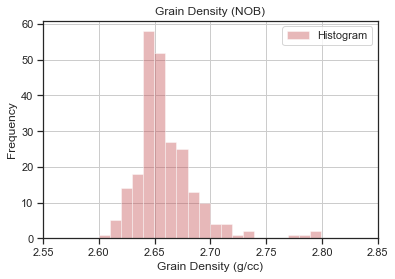

In [40]:
savefn = "Hist_GD_amb.png"

## fuction to plot - usage
## plot_grain_density (dataframe_column, plot_title, number_bins, x-axis_min, x_axis_max savefile_name)
plot_grain_density(df_sub['Grain Density (g/cc)'], "Grain Density (NOB)", 20, 2.55, 2.85, savefn)

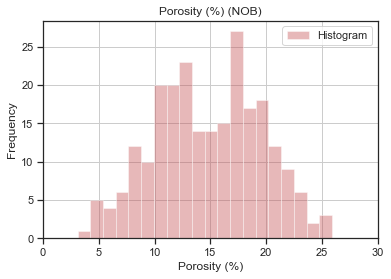

In [41]:
savefn = "Hist_Poro_amb.png"
plot_grain_density(df_sub["Porosity (%)"], "Porosity (%) (NOB)", 20, 0, 30, savefn)

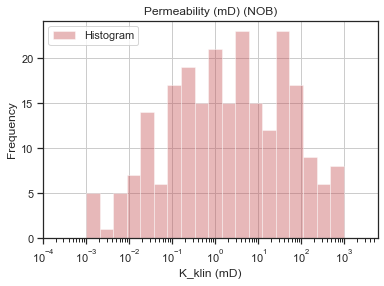

In [42]:
savefn = "Hist_Perm_amb.png"

x= df_sub["K_klin (mD)"]

logbins = np.geomspace(x.min(), x.max(), 20)
plt.xscale('log')
plot_grain_density(df_sub["K_klin (mD)"], "Permeability (mD) (NOB)", logbins, 0.0001, x.max()+5000, savefn)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:1099: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


Equation of line:  
0
Intercept: 0.0
Gradient Coefficient: 0.0


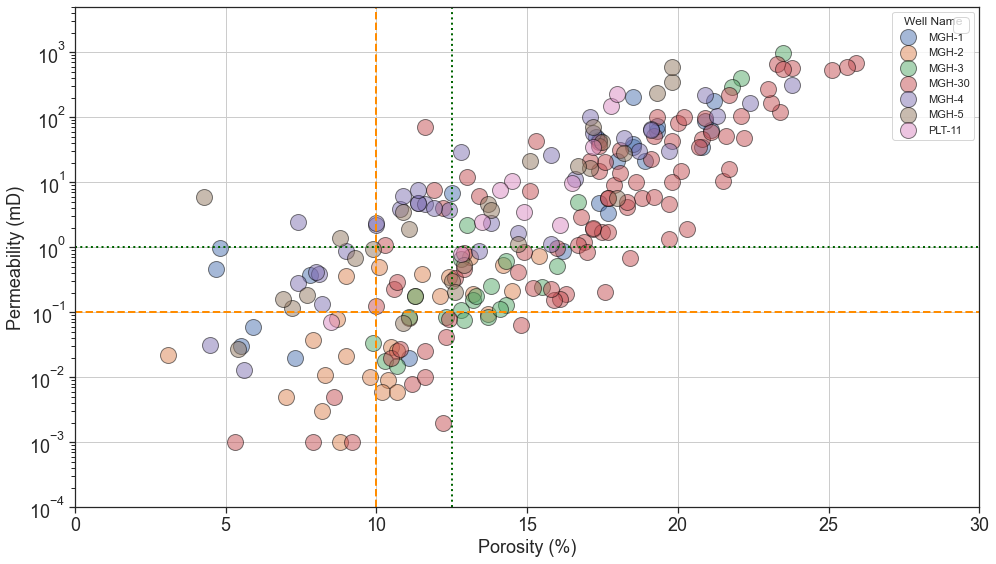

In [43]:
savefn = "Poro_Perm_amb.png"

xlimit = 30
ylimit = 5000

#Cutoff intercept
yint1 = 0.1
xint1 = 10

yint2 = 1
xint2 = 12.5

plot_line_eqn = False

f, p0, p1 = plot_PP(df_sub, grouped, color, 
                    "Ambient Porosity vs Permeability", savefn, xint1, yint1, 
                    xint2, yint2, xlimit, ylimit, plot_line_eqn)
print("Equation of line:", f)
print("Intercept:", p0)
print("Gradient Coefficient:", p1)

In [44]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

Completed Process in 7.376740455627441 seconds
